***Titanic - Machine Learning from Disaster***

***Import Libraries***

In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

***Import Data***

In [347]:
data = pd.read_csv("./train.csv")
test= pd.read_csv("./test.csv")

***Show Data***

In [348]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***Data Visualization***

<Axes: >

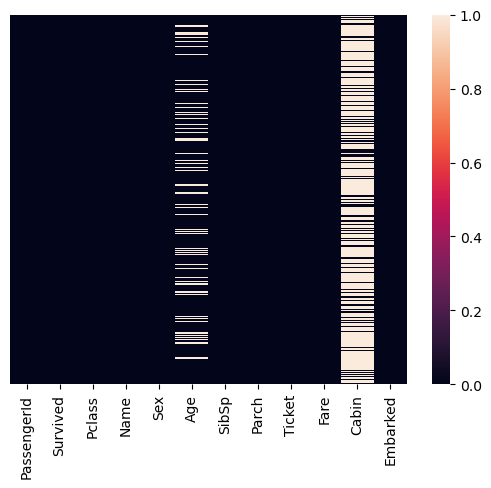

In [349]:
sns.heatmap(data.isnull(), yticklabels=False)

<Axes: xlabel='Pclass', ylabel='Age'>

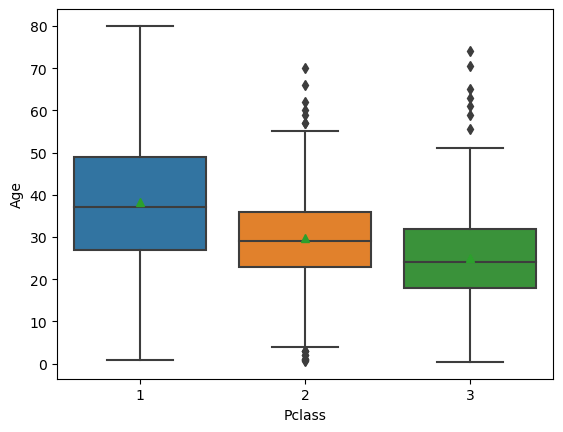

In [350]:
sns.boxplot(x="Pclass",y="Age",data=data,showmeans=True)

***Get a copy of test passenger Ids***

In [351]:
test_pid = np.array(test["PassengerId"])

***Fill null Age values***

In [332]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 27
    return Age
data["Age"] = data[["Age","Pclass"]].apply(fill_age,axis=1)
test["Age"] = test[["Age","Pclass"]].apply(fill_age,axis=1)

***Remove NaN values - Fare column***

In [333]:
data["Fare"].fillna(data["Fare"].mean(),inplace=True)
test["Fare"].fillna(test["Fare"].mean(),inplace=True)

***Final Visualization***

<Axes: >

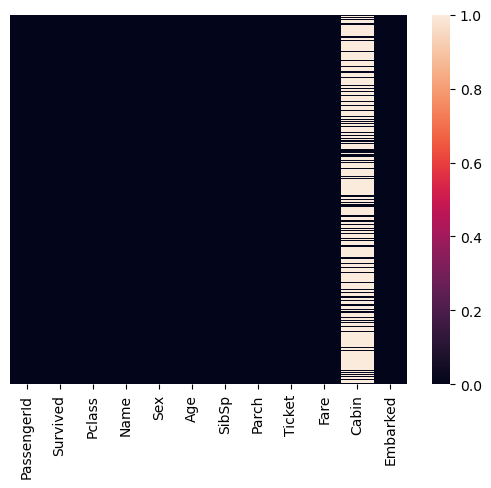

In [334]:
sns.heatmap(data.isnull(), yticklabels=False)

***Remove unnecessary columns***

In [335]:
def data_cleaning(data):
    df = data.drop(["PassengerId","Name","Ticket","Cabin"])
    return df

data = data.apply(data_cleaning,axis=1)


In [336]:
def test_cleaning(test):
    df_test = test.drop(["PassengerId","Name","Ticket","Cabin"])
    return df_test

test = test.apply(test_cleaning,axis=1)


***Clean data by replacing string with numeric values***

In [337]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ["Sex","Embarked"]
for col in cols:
    data[col] = le.fit_transform(data[col])
    test[col] = le.transform(test[col])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


***Train the model***

In [338]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = data.drop("Survived",axis=1)
y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lr = LogisticRegression(max_iter=1000)
model = lr.fit(X_train,y_train)

***Prediction***

In [339]:
prediction = model.predict(X_test)

***Model Evaluation***

In [340]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.8203389830508474

***Build a DataFrame of predictions***

In [343]:
submission = model.predict(test)
df = pd.DataFrame({"PassengerId" : test_pid  ,"Survived":submission})
print(df)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


***Export the result to a csv file***

In [344]:
df.to_csv("submission.csv",index=False)